# Projekt ML.

Do analizy przyjęto dane ze zbiotu 'cars.csv'

Zestawy danych przygotowano w części "Projekt ML, przygotowanie danych"

## Cel analizy: Od czego zależy bardziej ekonomiczne zużycie paliwa? Czy da się przewidzieć zużycie paliwa na podstawie danych ze zbioru?

Uczenie maszynowe będzie wykorzystywać regresję.

Dane do przetwarzania przygotowano z zamiarem pokazania wpływu jakości danych na efekty uczenia maszynowego.

Przygotowane zbiory danych:

Zbiór 1. Dane kategoryczne zostaną potraktowane jako liczbowe, kolumna 'names' nie bierze udziału w ML

Zbiór 2. Dane kategoryczne 'origin' rozdzielone (dummies), reszta danych jako dane liczbowe, kolumna 'names' nie bierze udziału w ML

Zbiór 3. Dane kategoryczne 'origin' i 'displacement' rozdzielone (dummies), reszta danych jako dane liczbowe, kolumna 'names' nie bierze udziału w ML

Zbiór 4. Dane kategoryczne 'origin' i 'displacement' rozdzielone (dummies), reszta danych jako dane liczbowe, kolumna 'names' zostaje rozpisana na słownik i bierze udział w ML  (taka namiastka LLM, to jest dobry moment na uśmiech)

Uczenie maszynowe z wykorzystaniem algorytmów:

* sklearn: LinearRegression

* sklearn: KNeighborsRegressor

W celu pokazania jak radzą sobie inne algorytmy ML pokazano parametry uczenia dla RandomForestRegressor oraz xgboost. Chodzi o pokazanie punktu odniesienia.


Hiperparametry algorytmów uczenia maszynowego nie są optymalizowane, przyjęto wartiości "przyzwoite"

W celu pozostawienia pola do popisu ocena uczenia realizowana jest metodą .score()

In [40]:
# import potrzebnych bibliotek
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg


In [41]:
# przygotowanie zestawienia zbiorów
data_file_names = [ 'cars_4_ML_no_dummy_cleared.csv', 'cars_4_ML_dummy_origin_cleared.csv',
              'cars_4_ML_dummy_all_cleared.csv', 'cars_4_ML_dummy_all_LLM_cleared.csv']
data_names = [ 'num', 'num_cat_origin', 'num_cat_all', 'num_cat_all_LLM' ]

In [42]:
# przygotowanie zestawienia modeli
model_lin = LinearRegression()
model_knn = KNeighborsRegressor(n_neighbors=5)
model_rf = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)
model_xgb = xg.XGBRegressor(objective ='reg:linear', n_estimators = 100, seed = 0)

models = [ model_lin, model_knn, model_rf, model_xgb ]
models_names = [ 'model_lin', 'model_knn', 'model_rf', 'model_xgb' ]

In [43]:
results = pd.DataFrame(columns= ['data_name', 'model_name', 'score_train', 'score_test'])
for data in data_names:
    df = pd.read_csv(data_file_names[data_names.index(data)])
    X_no_scaler = df.drop(columns=['name', 'mpg']).values
    scaler_x = StandardScaler()
    X = scaler_x.fit_transform(X_no_scaler)
    y_no_scaler = df['mpg'].values.reshape((-1,1))
    scaler_y = StandardScaler()
    y = scaler_y.fit_transform(y_no_scaler).reshape((-1,))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    for model in models:
        model_name = models_names[models.index(model)]
        model.fit(X_train, y_train)
        
        score_train = model.score(X_train, y_train)
        score_test = model.score(X_test, y_test)

        index = len(results)
        results.loc[index,'data_name'] = data
        results.loc[index,'model_name'] = model_name
        results.loc[index,'score_train'] = score_train
        results.loc[index,'score_test'] = score_test
        
        
    
print(results)

c:\Users\MG\Documents\Studia podyplomowe\PG\ML\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:55:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MG\Documents\Studia podyplomowe\PG\ML\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:55:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MG\Documents\Studia podyplomowe\PG\ML\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:55:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)


          data_name model_name score_train score_test
0               num  model_lin    0.832622   0.828823
1               num  model_knn     0.89511   0.870602
2               num   model_rf    0.980802   0.909116
3               num  model_xgb    0.999989   0.908028
4    num_cat_origin  model_lin    0.876747   0.848826
5    num_cat_origin  model_knn    0.927059   0.893803
6    num_cat_origin   model_rf      0.9869    0.91875
7    num_cat_origin  model_xgb    0.999992   0.908184
8       num_cat_all  model_lin    0.886706   0.820164
9       num_cat_all  model_knn    0.929549    0.85214
10      num_cat_all   model_rf    0.986673   0.893801
11      num_cat_all  model_xgb    0.999994   0.893935
12  num_cat_all_LLM  model_lin    0.982354   0.772834
13  num_cat_all_LLM  model_knn    0.793263   0.669914
14  num_cat_all_LLM   model_rf    0.987253   0.890397
15  num_cat_all_LLM  model_xgb    0.999681    0.87225


c:\Users\MG\Documents\Studia podyplomowe\PG\ML\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:55:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)


In [44]:
# wyniki dla danych
for data in data_names:
    print(results[ results['data_name']==data] )

  data_name model_name score_train score_test
0       num  model_lin    0.832622   0.828823
1       num  model_knn     0.89511   0.870602
2       num   model_rf    0.980802   0.909116
3       num  model_xgb    0.999989   0.908028
        data_name model_name score_train score_test
4  num_cat_origin  model_lin    0.876747   0.848826
5  num_cat_origin  model_knn    0.927059   0.893803
6  num_cat_origin   model_rf      0.9869    0.91875
7  num_cat_origin  model_xgb    0.999992   0.908184
      data_name model_name score_train score_test
8   num_cat_all  model_lin    0.886706   0.820164
9   num_cat_all  model_knn    0.929549    0.85214
10  num_cat_all   model_rf    0.986673   0.893801
11  num_cat_all  model_xgb    0.999994   0.893935
          data_name model_name score_train score_test
12  num_cat_all_LLM  model_lin    0.982354   0.772834
13  num_cat_all_LLM  model_knn    0.793263   0.669914
14  num_cat_all_LLM   model_rf    0.987253   0.890397
15  num_cat_all_LLM  model_xgb    0.999681  

In [45]:
# wyniki dla modeli
for model_n in models_names:
    print(results[ results['model_name']==model_n] )

          data_name model_name score_train score_test
0               num  model_lin    0.832622   0.828823
4    num_cat_origin  model_lin    0.876747   0.848826
8       num_cat_all  model_lin    0.886706   0.820164
12  num_cat_all_LLM  model_lin    0.982354   0.772834
          data_name model_name score_train score_test
1               num  model_knn     0.89511   0.870602
5    num_cat_origin  model_knn    0.927059   0.893803
9       num_cat_all  model_knn    0.929549    0.85214
13  num_cat_all_LLM  model_knn    0.793263   0.669914
          data_name model_name score_train score_test
2               num   model_rf    0.980802   0.909116
6    num_cat_origin   model_rf      0.9869    0.91875
10      num_cat_all   model_rf    0.986673   0.893801
14  num_cat_all_LLM   model_rf    0.987253   0.890397
          data_name model_name score_train score_test
3               num  model_xgb    0.999989   0.908028
7    num_cat_origin  model_xgb    0.999992   0.908184
11      num_cat_all  model_x

In [46]:
# najlepsze wyniki dla danych testowych
print('Najlepsze wyniki dla danych testowych:')
print(results.sort_values(by=['score_test'], ascending=False))

Najlepsze wyniki dla danych testowych:
          data_name model_name score_train score_test
6    num_cat_origin   model_rf      0.9869    0.91875
2               num   model_rf    0.980802   0.909116
7    num_cat_origin  model_xgb    0.999992   0.908184
3               num  model_xgb    0.999989   0.908028
11      num_cat_all  model_xgb    0.999994   0.893935
5    num_cat_origin  model_knn    0.927059   0.893803
10      num_cat_all   model_rf    0.986673   0.893801
14  num_cat_all_LLM   model_rf    0.987253   0.890397
15  num_cat_all_LLM  model_xgb    0.999681    0.87225
1               num  model_knn     0.89511   0.870602
9       num_cat_all  model_knn    0.929549    0.85214
4    num_cat_origin  model_lin    0.876747   0.848826
0               num  model_lin    0.832622   0.828823
8       num_cat_all  model_lin    0.886706   0.820164
12  num_cat_all_LLM  model_lin    0.982354   0.772834
13  num_cat_all_LLM  model_knn    0.793263   0.669914


<Axes: xlabel='score_train', ylabel='score_test'>

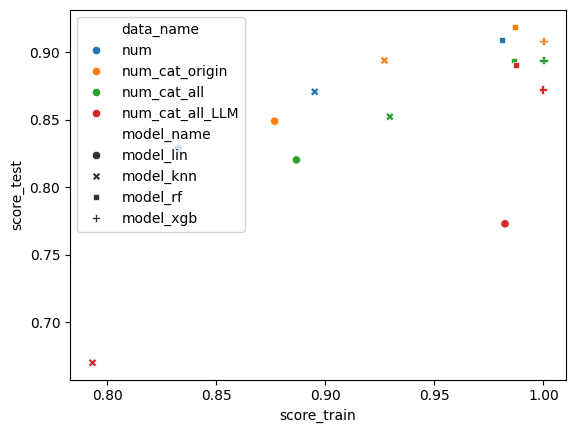

In [47]:
sns.scatterplot(data=results, x='score_train', y='score_test', hue='data_name', style='model_name')

Metody LinearRegression oraz KNeighborsRegressor dają całkiem niezłe wyniki. Wyniki są mocno zależne od danych, które są przedstawiane do uczenia i testowania.

Przypominam, że metody RandomForestRegressor oraz xgboost tylko jako punkty odniesienia.

Pomysły na ulepszenia:

* przegląd danych pod kątem rozkładów, typów relacji, może potraktować logarytmem, itd.

* pomysły na traktowanie kategorii w danych

* pomysły na nowe features (zmienne na podstawie których ML określa wynik)

* inne miary dopasowania modeli, może sposoby uczenia, ...

* inny sposób normalizacji danych

* może inaczej przygotować dane, inny sposób określenia outliers, ...